In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

In [2]:
# Change this cell to load from multiple samples, and concatenate. 
# make sure to place channels correctly, in case they're permuted for some reason between collections.
import glob
srch = '/common/ingn/CODEX_PROCESSED_DATA/pembroRT_immune/phase2/*/collection*'

image_files = sorted(glob.glob(f'{srch}/training_cells_images.npy'))
annot_files = sorted(glob.glob(f'{srch}/training_cells_annots.npy'))
channel_files = sorted(glob.glob(f'{srch}/training_cells_channels.npy'))

for f,af in zip(image_files, annot_files):
    x = np.load(f)
    y = np.load(af)
    
    if x.shape[0] != y.shape[0]:
        print(f)

for f in image_files:
    print(f)

images = np.concatenate([np.load(f) for f in image_files], axis=0)
annots = np.concatenate([np.load(f) for f in annot_files], axis=0)
channels = np.load(channel_files[0])

channels = {k:i for i,k in enumerate(channels)}

print(images.shape, images.dtype)
print(annots.shape)
print(np.unique(annots, return_counts=True))
print(channels)

perm = np.random.choice(images.shape[0], images.shape[0], replace=False)
images = images[perm]
annots = annots[perm]

u_annots, annots_int = np.unique(annots, return_inverse=True)
labels = np.eye(len(u_annots))[annots_int]
# labels[annots == '', :] = 0 
labels = labels[:,1:]

print(labels.shape)
print('labelled cells:', np.sum(np.sum(labels, axis=1)>0))

/common/ingn/CODEX_PROCESSED_DATA/pembroRT_immune/phase2/210701_PembroRT_Cas18_TLSpanel_reg1/collection-21-Jul-18-19-33-17/training_cells_images.npy
/common/ingn/CODEX_PROCESSED_DATA/pembroRT_immune/phase2/210701_PembroRT_Cas18_TLSpanel_reg2/collection-21-Jul-18-15-08-49/training_cells_images.npy
/common/ingn/CODEX_PROCESSED_DATA/pembroRT_immune/phase2/210701_PembroRT_Cas18_TLSpanel_reg2/collection-21-Jul-18-17-33-48/training_cells_images.npy
/common/ingn/CODEX_PROCESSED_DATA/pembroRT_immune/phase2/210701_PembroRT_Cas18_TLSpanel_reg2/collection-21-Jul-18-21-36-20/training_cells_images.npy
/common/ingn/CODEX_PROCESSED_DATA/pembroRT_immune/phase2/210701_PembroRT_Cas18_TLSpanel_reg3/collection-21-Jul-18-16-02-55/training_cells_images.npy
/common/ingn/CODEX_PROCESSED_DATA/pembroRT_immune/phase2/210701_PembroRT_Cas18_TLSpanel_reg3/collection-21-Jul-18-18-08-54/training_cells_images.npy
/common/ingn/CODEX_PROCESSED_DATA/pembroRT_immune/phase2/210702_PembroRT_Cas19_TLSpanel_reg2/collection-21

In [3]:
# subtract the average of each channel
channel_means = {}
for ch,i in channels.items():
    stack = images[:,:,:,i]
    mn = np.mean(stack, axis=0, keepdims=True)
    print(ch, i, stack.shape, mn.shape)
    channel_means[ch] = mn.copy().astype(np.float32)

DAPI 0 (122092, 64, 64) (1, 64, 64)
CD8 1 (122092, 64, 64) (1, 64, 64)
CD4 2 (122092, 64, 64) (1, 64, 64)
PanCytoK 3 (122092, 64, 64) (1, 64, 64)
PD-1 4 (122092, 64, 64) (1, 64, 64)
CD45 5 (122092, 64, 64) (1, 64, 64)
CD20 6 (122092, 64, 64) (1, 64, 64)
CD138 7 (122092, 64, 64) (1, 64, 64)
CD68 8 (122092, 64, 64) (1, 64, 64)
CD31 9 (122092, 64, 64) (1, 64, 64)
CD11c 10 (122092, 64, 64) (1, 64, 64)
FOXP3 11 (122092, 64, 64) (1, 64, 64)
CXCR5 12 (122092, 64, 64) (1, 64, 64)
CXCL13 13 (122092, 64, 64) (1, 64, 64)
CD3e 14 (122092, 64, 64) (1, 64, 64)
Ki-67 15 (122092, 64, 64) (1, 64, 64)
LAG3 16 (122092, 64, 64) (1, 64, 64)
HLA-DR 17 (122092, 64, 64) (1, 64, 64)
aSMA 18 (122092, 64, 64) (1, 64, 64)


In [4]:
images_pp = images.copy().astype(np.float32)
for ch, mn in channel_means.items():
    if ch=='DAPI':
        continue
    k = channels[ch]
    print(ch,k,mn.shape,mn.dtype)
    images_pp[:,:,:,k] -= mn

CD8 1 (1, 64, 64) float32
CD4 2 (1, 64, 64) float32
PanCytoK 3 (1, 64, 64) float32
PD-1 4 (1, 64, 64) float32
CD45 5 (1, 64, 64) float32
CD20 6 (1, 64, 64) float32
CD138 7 (1, 64, 64) float32
CD68 8 (1, 64, 64) float32
CD31 9 (1, 64, 64) float32
CD11c 10 (1, 64, 64) float32
FOXP3 11 (1, 64, 64) float32
CXCR5 12 (1, 64, 64) float32
CXCL13 13 (1, 64, 64) float32
CD3e 14 (1, 64, 64) float32
Ki-67 15 (1, 64, 64) float32
LAG3 16 (1, 64, 64) float32
HLA-DR 17 (1, 64, 64) float32
aSMA 18 (1, 64, 64) float32


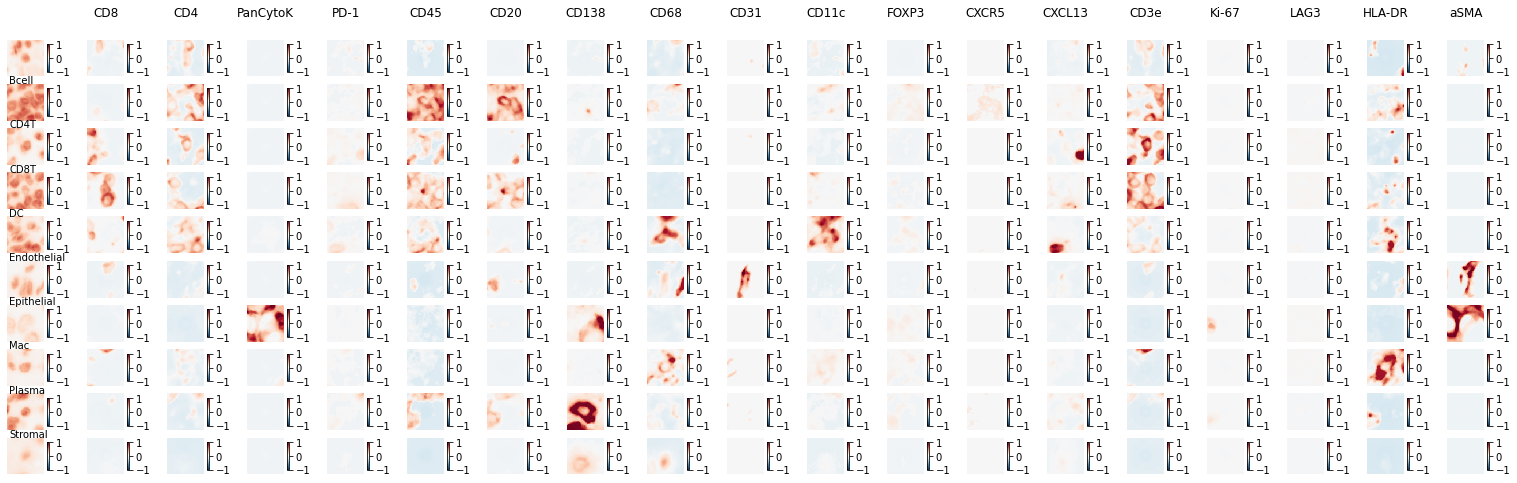

In [5]:
# chs = ['DAPI', 'CD8', 'CD4', 'PanCytoK', 'CD138', 'CD20', 'CD45', 'CD68', 'CD31', 'CXCL13']
chs = list(channels.keys())

A=1
fig = plt.figure(figsize=(18*(A+0.5),8*A))
u_cts = np.unique(annots)

m = 1
for i,ct in enumerate(u_cts):
    inds = np.nonzero(annots==ct)[0] 
    ind = np.random.choice(inds)
    
    for j,ch in enumerate(chs):
        ax = fig.add_subplot(len(u_cts),len(chs),m)
        m += 1
        
        k = channels[ch]
        img = images_pp[ind, :, :, k] / 255.
        
        b = ax.matshow(img, cmap='RdBu_r', vmin=-1, vmax=1)
        plt.colorbar(b, ax=ax, shrink=0.75)
        ax.axis('off')
    
        if (i==0) & (j!=0):
            ax.set_title(ch)
        
        if j==0:
            ax.annotate(ct, (0.05, 1.01), xycoords='axes fraction', color='k') 
#             ax.set_title(ct)


In [6]:
for k in range(images_pp.shape[-1]):
    print(np.min(images_pp[:,:,:,k]), np.max(images_pp[:,:,:,k]))

0.0 255.0
-17.831398 242.23668
-36.56867 225.76337
-9.509935 249.2646
-12.68346 246.93799
-41.964527 224.16544
-9.489033 247.62642
-14.825271 243.31781
-42.224575 219.48117
-1.6783737 253.86542
-20.521967 238.3494
-12.128379 247.74026
-1.2583297 254.01262
-21.508968 239.184
-35.305878 230.31393
-3.2753825 253.79936
-6.1451364 250.85435
-43.36942 219.19745
-11.554246 246.1193
